<a href="https://colab.research.google.com/github/diazid/sales-predictions/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 3: Food Sales Prediction

Name: Israel Diaz



**Description:**

This project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

**Data**

The data frame register 8523 entries and 12 variable. Each variable represent the following. 



|Variable Name            	| Description |
|---------------------------|-------------|
|Item_Identifier            |	Unique product ID|
|Item_Weight	              | Weight of product|
|Item_Fat_Content           |	Whether the product is low fat or regular|
|Item_Visibility          	|The percentage of total display area of all products in a store allocated to the particular product|
|Item_Type	                |The category to which the product belongs|
|Item_MRP	                  |Maximum Retail Price (list price) of the product|
|Outlet_Identifier          |Unique store ID|
|Outlet_Establishment_Year	|The year in which store was established|
|Outlet_Size	              |The size of the store in terms of ground area covered|
|Outlet_Location_Type	      |The type of area in which the store is located|
|Outlet_Type	              |Whether the outlet is a grocery store or some sort of supermarket|
|Item_Outlet_Sales         	|Sales of the product in the particular store. This is the target variable to be predicted. |


## Loading Data

Loading data from container

In [1]:
filepath = 'https://drive.google.com/uc?export=download&id=1apwZQiYRcktux62Ki6qaJa_JI-hDGb75'

In [2]:
#IMPORTING PANDAS LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [3]:
#LOADING DATA INTO PANDAS DATAFRAME
df = pd.read_csv(filepath)

Previewing the content and info.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


I see that there is a couple of the variables that has missing values:

* No. Entries : 8523
* `Item Weight` : 7060 non null values
* `Outlet_Size` : 6113 non null values

Other variables are complete. 

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.shape

(8523, 12)

## Data Cleaning

### Data types

In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

All data types seems to be correct, at least in the first watch. If in the next steps I find I have to change in the data types it will be done. 

### Finding Duplicates

In [8]:
df.duplicated().sum()

0

There are no duplicated entries in the data set.

### Solving Missing Values

In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are have missing values in `Item_Weight` and `Outlet_type` columns. 

I'll impute the mean value according the `Item_Type`, let's say, not just only 1 mean for all the missing values but the ones grouped by `Item_Type`.


In [10]:
df['Item_Weight'] = df.groupby("Item_Type")["Item_Weight"].transform(lambda x: x.fillna(x.mean()))


## taken from 
## 'https://datascience.stackexchange.com/questions/37717/imputation-missing-values-other-than-using-mean-median-in-python'

In [11]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Done!

Other columns that presented missing values is `Outlet_Size` variable:

In [12]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

There are three categories in the `Outlet_Size` variable:
* Small
* Medium
* High

Due to the this variable is categorical, and due to we don't know more information about the reason of the missing values, I will impute the missing values to `unknown` category. 

Once this is corrected, I can continue with the previus analysis between `Outlet_Size` and `Item_Fat_Content`

#### Imputing missing values to `unknown` category.

In [13]:
# IMPUTING MISSING VALUES TO UNKNOWN CATEGORY

#imputing the missing values to Unknown
df['Outlet_Size'].fillna('Unknown', inplace=True)

#### Checking the data with imputed values

In [14]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
df['Outlet_Size'].unique()

array(['Medium', 'Unknown', 'High', 'Small'], dtype=object)

Done!, 

No more missing values. 

### Looking for Inconsistencies

In [16]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

I will assume that the category `LF` is the same as `Low Fat`, as well as `reg` to `Regular`. And the will be added capt to `low fat`. 

In [17]:
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                'low fat': 'Low Fat', 
                                'reg': 'Regular'}, 
                                inplace=True)

df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [18]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [19]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [20]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [21]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [22]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

I see no more inconsistencies

### Summary statistics

In [23]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals

Before perform any explortory analysis I will covert variables into categorical

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [25]:
# Converting variables into categorial when is the case. 

df['Item_Identifier'] = df['Item_Identifier'].astype('category')
df['Item_Fat_Content'] = df['Item_Fat_Content'].astype('category')
df['Item_Type'] = df['Item_Type'].astype('category')
df['Outlet_Identifier'] = df['Outlet_Identifier'].astype('category')
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')
df['Outlet_Size'] = df['Outlet_Size'].astype('category')
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].astype('category')
df['Outlet_Type'] = df['Outlet_Type'].astype('category')



Checking the results

In [26]:
df.dtypes

Item_Identifier              category
Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier            category
Outlet_Establishment_Year    category
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object

#### Histograms

I want to see the distribution of data of some variables

##### Item_fat_content

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


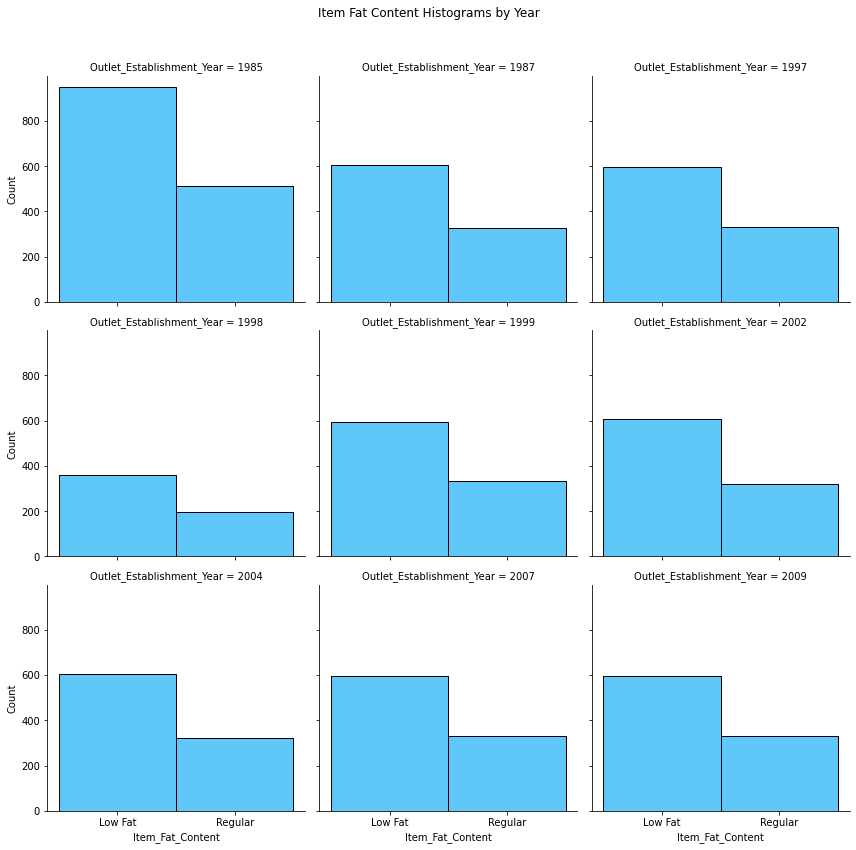

In [27]:
ax = sns.FacetGrid(data = df,
              col= 'Outlet_Establishment_Year',
              sharex= True, sharey= True,
              col_wrap=3,
              size=4, aspect=1
              )
ax.map_dataframe(sns.histplot,  
             x="Item_Fat_Content", 
             color = '#29B6F6',
             ax = ax)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Item Fat Content Histograms by Year')
ax.set_xticklabels(rotation=0)  #rotate xlabels
plt.show()

# FacetGrid taken from Seaborn Documentation.
# Title taken from https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot

Insights:

* The low fat items almost doubled the regular items in quantity every year.

##### Item_Type


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


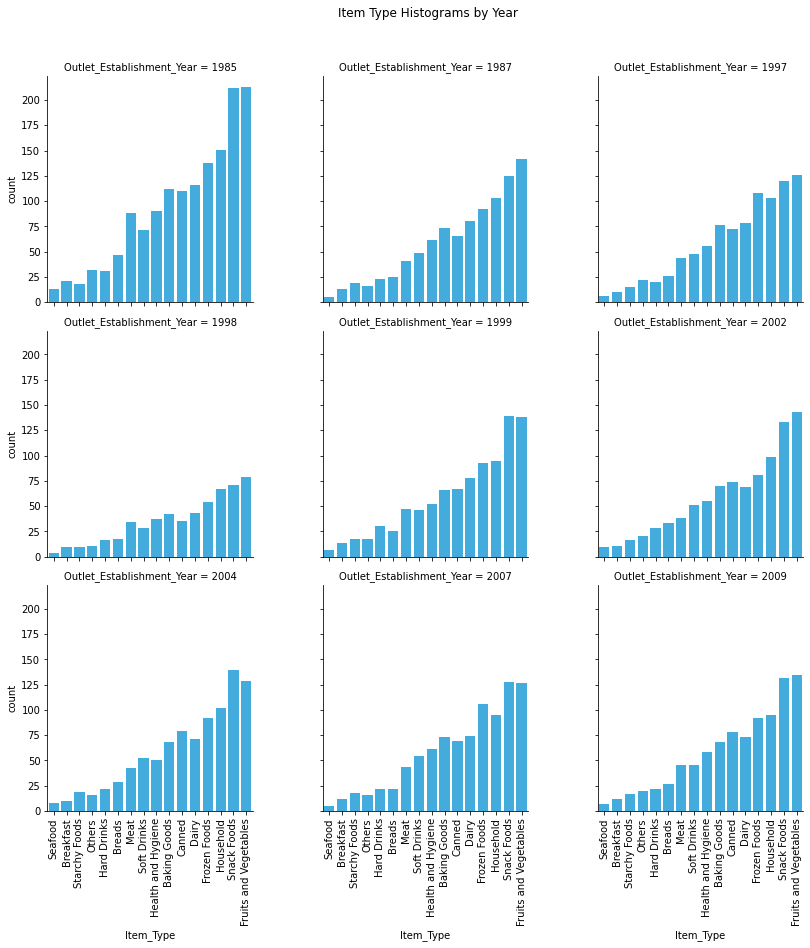

In [28]:
ax = sns.FacetGrid(data = df,
              col= 'Outlet_Establishment_Year',
              sharex= True, sharey= True,
              col_wrap=3,
              size=4, aspect=1
              )
ax.map_dataframe(sns.countplot, 
                 x="Item_Type", 
                 color = '#29B6F6',
                 order=df.Item_Type.value_counts(ascending=True).index, 
                 ax=ax)
ax.set_xticklabels(rotation=90)  #rotate xlabels
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Item Type Histograms by Year') #Mail title
plt.show()

# FacetGrid taken from Seaborn Documentation.
# Title taken from https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot

Insights:

- Seafood was the item with less quantity every year. 
- Fruits and Vegetables was the item with more quantity almost every year except 2007, followed by Snack Foods that was the first one in 2007..

##### Outlet_stablishment_Year

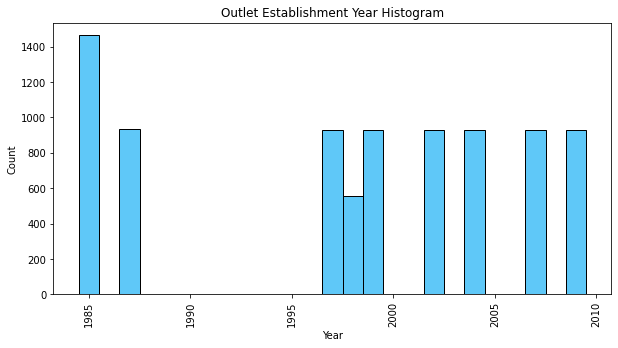

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, 
             x="Outlet_Establishment_Year", 
             color = '#29B6F6',
             ax = ax)

plt.title('Outlet Establishment Year Histogram')
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.show()

Insights:

- Not every year were established Outlets.
- 1985 was the year of the greater amounts of outlets. 

##### Outlet Size

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


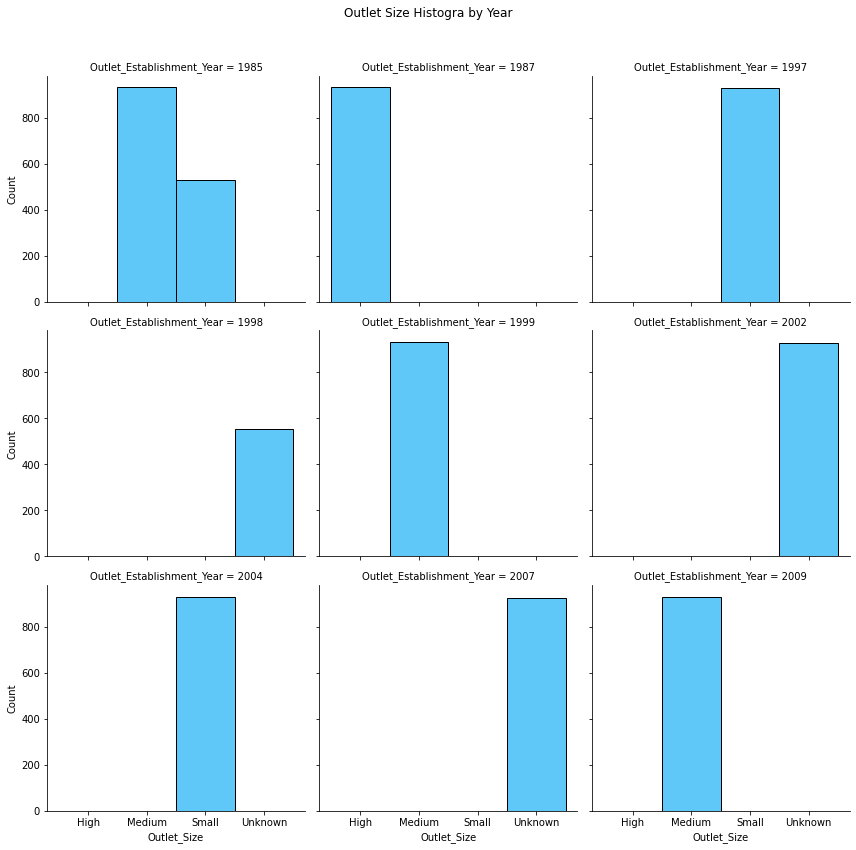

In [30]:
ax = sns.FacetGrid(data = df,
              col= 'Outlet_Establishment_Year',
              sharex= True, sharey= True,
              col_wrap=3,
              size=4, aspect=1
              )
ax.map_dataframe(sns.histplot,  
             x="Outlet_Size", 
             color = '#29B6F6',
             ax = ax)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Outlet Size Histogra by Year')
ax.set_xticklabels(rotation=0)  #rotate xlabels
plt.show()

Insights:

- 1985 were established small and medium sized outlets. And medium sized outlets doubled the small ones.
- 1987 was the only year in which was established high sized outlets. 
- 1998, 2002 and 2007 we don't know the size of the outlet.
- The other years were medium sized oulets. 

#### Boxplots

##### Fat Content vs Outlet Sales

I want to know how the sales performed by Item Fat Content.

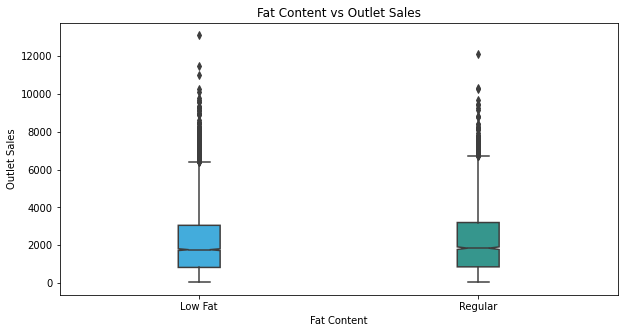

In [31]:
fig, ax = plt.subplots(figsize = (10,5))
sns.boxplot(data = df,
            x = 'Item_Fat_Content',
            y = 'Item_Outlet_Sales',
            notch = True,
            width = 0.15,
            palette = ['#29B6F6', '#26A69A'],
            ax = ax
            )

plt.title('Fat Content vs Outlet Sales')
plt.xlabel('Fat Content')
plt.ylabel('Outlet Sales')
plt.show()

In [32]:
print('Low Fat Median:', np.median(df[df.Item_Fat_Content == 'Low Fat']['Item_Outlet_Sales']))
print('Regular Median:', np.median(df[df.Item_Fat_Content == 'Regular']['Item_Outlet_Sales']))
print('Low Fat Q3:', np.percentile(df[df.Item_Fat_Content == 'Low Fat']['Item_Outlet_Sales'], 75))
print('Regular Q3:', np.percentile(df[df.Item_Fat_Content == 'Regular']['Item_Outlet_Sales'], 75))
print('Most Sold LF:', np.max(df[df.Item_Fat_Content == 'Low Fat']['Item_Outlet_Sales']))
print('Most Sold Reg:', np.max(df[df.Item_Fat_Content == 'Regular']['Item_Outlet_Sales']))

Low Fat Median: 1765.0358
Regular Median: 1844.5989
Low Fat Q3: 3050.6956
Regular Q3: 3198.66965
Most Sold LF: 13086.9648
Most Sold Reg: 12117.56


Insights:

- In average, the outlets sold near 1800 both in Low Fat and Regulat Items. 
- 75% of the sales in Low Fat items are bellow the 3050, versus Regular Items are bellow 3198.
- We see a long number of dots above both boxes but in this case ther are not to be considered outliers because they are all part of the observations. 
- The item that sold the most in Low Fat made 13086 vs the one in Regular made 12117




##### Outlet Size vs Outlet Sales

I will to do the same with the Outlet Size

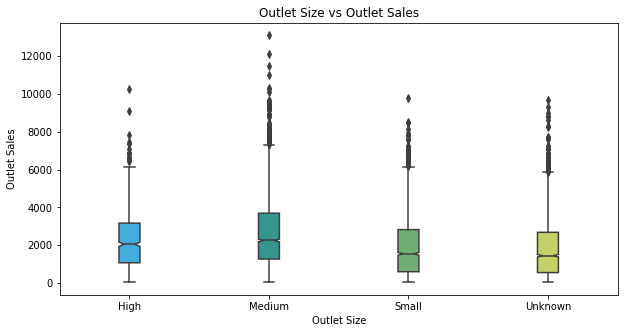

In [33]:
fig, ax = plt.subplots(figsize = (10,5))
sns.boxplot(data = df,
            x = 'Outlet_Size',
            y = 'Item_Outlet_Sales',
            notch = True,
            width = 0.15,
            palette = ['#29B6F6', '#26A69A', '#66BB6A', '#D4E157'],
            ax = ax
            )

plt.title('Outlet Size vs Outlet Sales')
plt.xlabel('Outlet Size')
plt.ylabel('Outlet Sales')
plt.show()

In [34]:
print('High Median:', np.median(df[df.Outlet_Size == 'High']['Item_Outlet_Sales']))
print('Medium Median:', np.median(df[df.Outlet_Size == 'Medium']['Item_Outlet_Sales']))
print('Small Median:', np.median(df[df.Outlet_Size == 'Small']['Item_Outlet_Sales']))
print('Unknown Median:', np.median(df[df.Outlet_Size == 'Unknown']['Item_Outlet_Sales']))

print('High Q3:', np.percentile(df[df.Outlet_Size == 'High']['Item_Outlet_Sales'], 75))
print('Medium Q3:', np.percentile(df[df.Outlet_Size == 'Medium']['Item_Outlet_Sales'], 75))
print('Small Q3:', np.percentile(df[df.Outlet_Size == 'Small']['Item_Outlet_Sales'], 75))
print('Unknown Q3:', np.percentile(df[df.Outlet_Size == 'Unknown']['Item_Outlet_Sales'], 75))

print('High Most sold:', np.max(df[df.Outlet_Size == 'High']['Item_Outlet_Sales']))
print('Medium Most sold:', np.max(df[df.Outlet_Size == 'Medium']['Item_Outlet_Sales']))
print('Small Most sold:', np.max(df[df.Outlet_Size == 'Small']['Item_Outlet_Sales']))
print('Unknown Most sold:', np.max(df[df.Outlet_Size == 'Unknown']['Item_Outlet_Sales']))

High Median: 2050.664
Medium Median: 2251.0698
Small Median: 1544.656
Unknown Median: 1443.4544
High Q3: 3166.37835
Medium Q3: 3691.1952
Small Q3: 2824.3236
Unknown Q3: 2681.5095
High Most sold: 10256.649
Medium Most sold: 13086.9648
Small Most sold: 9779.9362
Unknown Most sold: 9664.7528


Insights:

- Small sized Outlet made sales with an median of 1544. The 75% of the sales located bellow of 3166, and made the maximum of 10256. 
- Medium sized Outlet made the more amount of sales with an median of 2251. The 75% of the sales located bellow of 2824, and made the maximum of 9779. This is correct because Medium sized outlets sales is the greater part in the dataset. 
- High sized Outlet made sales with an median of 2050. The 75% of the sales located bellow of 3166, and made the maximum of 10256. 
- Unknown sized Outlet made sales with an median of 1443. The 75% of the sales located bellow of 2681, and made the maximum of 9664. 

#### Correlations of the variables

For this task I will plot a heatmap for better undestanding the data

In [35]:
corr = df.corr()

In [36]:
corr

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.011620,0.025821,0.012088
Item_Visibility,-0.011620,1.000000,-0.001315,-0.128625
Item_MRP,0.025821,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.012088,-0.128625,0.567574,1.000000


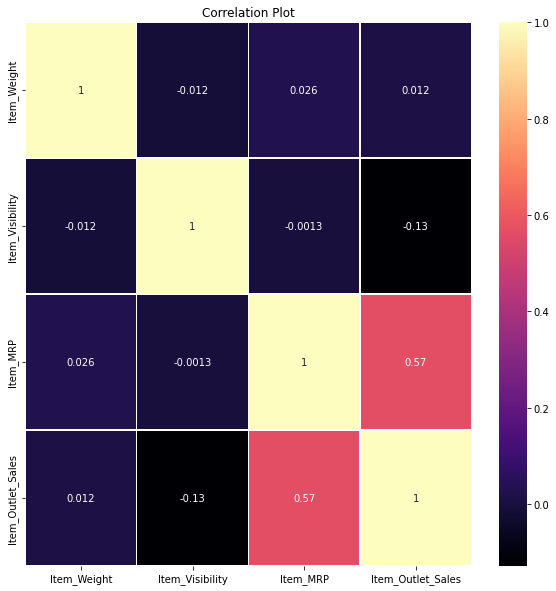

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, 
            cmap = 'magma', 
            annot = True, 
            linewidth=.5, 
            ax = ax)

plt.title('Correlation Plot')
plt.show()

Insights:

- Item_Outlet_Sales and Item_MRP, with moderate correlation of 0.57.
- Everyother posible pair of variables seems no to be correlated. 



## Explanatory Visuals

### Sales per Item Type, Outlet Location and Year.

In [38]:
#Building a Parallel Set
import plotly.graph_objects as go

## taken from https://plotly.com/python/parallel-categories-diagram/

#getting values of location type, stablishment year, and item type
storelist = df.Outlet_Location_Type.unique().tolist()
yearlist = df.Outlet_Establishment_Year.unique().tolist()
itemlist = df.Item_Type.unique().tolist()

#designing a function to perform the task
def categorical_dimensions(storeloc, year, item):
  #defining variables
  itemtype = {'label':'Item Type', 'values': []}
  locationtype = {'label':'Location Type', 'values': []}
  yearvalue = {'label':'Year', 'values': []}
  global sales
  global dimensions
  sales=[]

  # iteration
  for year in yearlist:
    for store in storelist:
      for item in itemlist:
        itemtype['values'].append(item)
        locationtype['values'].append(store)
        yearvalue['values'].append(year)
        #operation
        result = sum(df[(df['Outlet_Location_Type'] == store) & (df['Item_Type'] == item) & (df['Outlet_Establishment_Year'] == year)]['Item_Outlet_Sales'])
        sales.append(result)
  dimensions = [itemtype, locationtype, yearvalue]
  return 
  
categorical_dimensions(storelist, yearlist, itemlist)

#creating 16 random colors (taken from stackoverflow https://stackoverflow.com/questions/28999287/generate-random-colors-rgb)
random.seed('greenbelt')
no_of_colors=16
color=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]) for j in range(no_of_colors)]

#linking colors to a item type
item_colors = dict(zip(np.unique(dimensions[0]['values']), color))

#mapping color to the list of items
color_list = [*map(item_colors.get, dimensions[0]['values'])]
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']]
#building the parallel set graph
####STILL WORKING ON THIS GRAPH I'M HAVING ISSUES WITH THE COLORS

fig = go.Figure(go.Parcats(
    dimensions= dimensions,
    counts=sales, line={'shape': 'hspline', 'cmin':0, 'cmax':1,
                        'color': color_list, 'colorscale':colorscale},
    hoveron='color', hoverinfo='count',
    labelfont={'size': 16, 'family': 'Verdana'},
    tickfont={'size': 12, 'family': 'Verdana'},
    arrangement='freeform')
)

fig.update_layout(
        height=800, width=700,
        dragmode='lasso', hovermode='closest')

fig.show()

**Insights**

This graph is very insightfull because is possible to compare 2 or more  variables. 

In this case I am studying `Item_Type`, `Outlet_Location_Type`, and `Outlet_Establishment_Year`, and the width of every stream correspond to the sales of that particular portion of the stream, so it is possible to compare the total sales per item, location, and year. 

* By hovering over the graph is easy to see that the item most sold was `Fruits and Vegetables` of every year.
* Tier_1 location sold the most in years 1997 and 1999.
* Tier 2 location sold the most in years 2002, 2004, and 2007
* Tier 3 location sold the most in years 1985, 1987, 1998, and 2009
* The proportions of Items in every Tier location seem to be the same.

### Item Visibility vs Outlet Sales

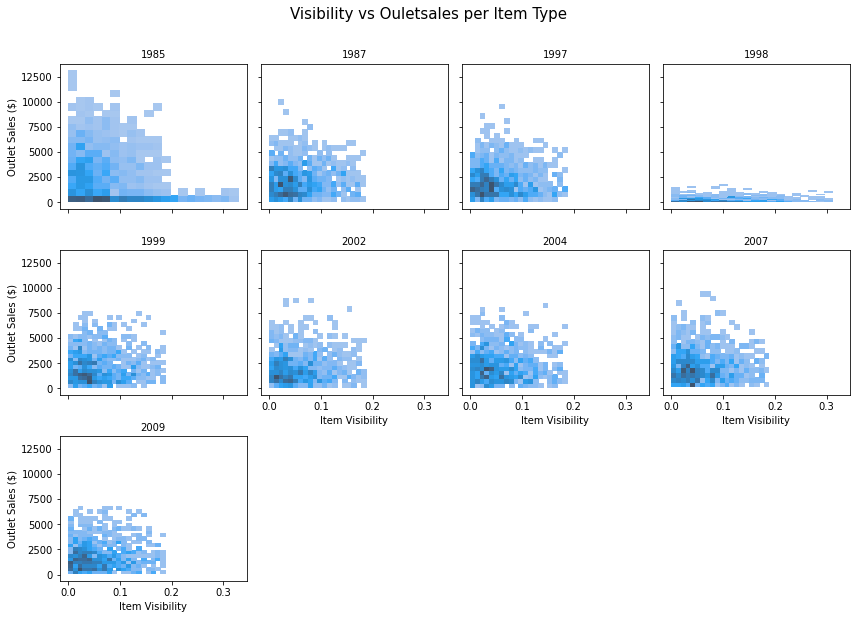

In [39]:
## Facetgrid (taken from seaborn documentation)

#define facetgrid
g = sns.FacetGrid(data=df, 
                  col="Outlet_Establishment_Year", 
                  palette='Blues', 
                  col_wrap=4, 
                  margin_titles=True, 
                  despine=False, 
                  sharex=True, 
                  sharey=True)

#mapping the graph
g.map_dataframe(sns.histplot, 
                x="Item_Visibility", 
                y="Item_Outlet_Sales", 
                bins=(20,20))

#aesthetics
g.fig.suptitle('Visibility vs Ouletsales per Item Type', fontsize=15)
g.set_axis_labels("Item Visibility", "Outlet Sales ($)")
g.set_titles(col_template="{col_name}")
g.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()